# Что такое категориальные переменные?

Категориальные переменные (их также могут называть факторными, номинальными)  — это переменные, принимающие дискретные значения, представляющие собой категории или классы.

Примеры:

- Пол: "Мужской", "Женский".
- Цвет: "Красный", "Синий", "Зелёный".
- Образование: "Среднее", "Высшее", "Докторантура".

Для работы с большинством моделей машинного обучения необходимо преобразовать категориальные переменные в числовую форму, так как многие алгоритмы ML работают с числовым представлением данных, особенно линейные алгоритмы или алгоритмы, чьи вычисления основаны на расстоянии. Стоит отметить, что категориальные признаки могут быть и числовыми.

Давайте для примера рассмотрим открытый набор данных с платформы Kaggle: https://www.kaggle.com/datasets/allexanderspb/studentsperformance


In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/allexanderspb/studentsperformance'
od.download(dataset_url)

# {"username":"adele1997","key":"3d752ef4484f4ee0c4a1164c37d74f04"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/allexanderspb/studentsperformance


100%|██████████| 8.70k/8.70k [00:00<00:00, 16.3MB/s]

In [3]:
import pandas as pd

df = pd.read_csv('/content/studentsperformance/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


У нас есть много разных переменных в данных, а именно:
- gender - пол студента
- race/ethnicity - этническая принадлежность в виде определенной группы
- parental level of education - уровень образования родителей
- lunch - обед
- test preparation course - курс подготовки к тесту
- math score - оценка по математике
- reading score - оценка за чтение
- writing score - оценка за письменную часть

Давайте подробнее взглянем на наш датасет:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Во-первых, видим, что у нас нет пропусков, что уже упрощает нам дальнейшую работу. Во-вторых, исходя из начального анализа, мы видим, что **math score, reading score, writing score** - является числовыми признаками (`int`).

А что же с остальными переменными? Все остальные переменные называются категориальными. Хотя теоретически, переменные **math score, reading score, writing score** можно также рассматривать как категориальные, но уже в числовом представлении, если допустить, что все оценки всегда целые от 0 до 100, т.е. дискретные, просто в данных переменных у нас очень много категорий.

Рассмотрим способы кодирования таких переменных в числовое представление.

# Обработка категориальных признаков

Попробуем самый простой способ кодирования признаков:
1. Вручную создадим словарь уникальных слов
2. Каждому слову сопоставим число
3. Заменим в столбце слова на число

Для примера возьмем одну из переменных, а именно `gender`. Посмотрим сколько различных категорий в ней представлено:

In [ ]:
# Возвращает все уникальные значения в столбце
df['gender'].unique()
# df['gender'].nunique()

array(['female', 'male'], dtype=object)

Теперь мы знаем, что в переменной всего два различных значения, т.е. две категорий: `female` и `male`.

Создадим свой словарь для дальнейшего преобразования в числа исходя из этого и закодируем нашу переменную:

In [5]:
# знаем что все два уникальных значения
# создадим свой словарь исходя из этого
d = {'female': 0, 'male': 1}

# Заменим категориальные значения в столбце на числа
df['gender'] = df['gender'].map(d)
# df['gender'] = df['gender'].str.replace(d)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


Теперь в столбце gender вместо female будет 0, а вместо male - 1.

В принципе, мы с вами рассмотрели самый простой и очевидный способ кодирования переменной, но у него есть и недостатки. Как вы думаете какие?

*В случае когда у нас много категорий, создавать вручную словарь долго и не рационально. Но даже если мы создаем вручную его, как правильно определить число некоторой категории?*

### Кодирование с помощью готовых методов

Существуют разные способы кодирования категориальных признаков, мы рассмотрим два самых популярных метода и способа:

1. **Label Encoding**

Простой и один из самых популярных способов, в котором категориальные данные, представленные в виде меток или строк, преобразуются в числовой формат. В этом методе кодирования каждой уникальной категории назначается уникальное целое число, эффективно преобразуя категориальные данные в числовые значения.

В библиотеке `sklearn` в модуле preprocessing существует готовый алгоритм `LabelEncoder()`, который отвечает за кодирование переменных. Давайте рассмотрим его работу на примере переменной `test preparation course`.

Импортируем необходимые библиотеки:

`from sklearn import preprocessing`

Напомним, что одной из ключевых особенностей библиотеки Scikit-learn является унифицированный подход к реализации алгоритмов. Большинство алгоритмов машинного обучения и методов предобработки данных в этой библиотеке реализованы в виде классов, что делает их использование интуитивно понятным и последовательным:
1. Создание объекта класса (т.е. инициализация алгоритма)
2. Обучение (fit)
3. Применение (predict для алгоритмов ML, transform для алгоритмов предобработки данных)


In [6]:
df['test preparation course'].unique()
# 0 до N-1
# 0 1

array(['none', 'completed'], dtype=object)

In [7]:
from sklearn import preprocessing
# from sklearn.preprocessing import LabelEncoder

# инициализация алгоритма кодирования
label_encoder = preprocessing.LabelEncoder()

# Обучение алгоритма:
label_encoder.fit(df['test preparation course'])

# fit - обучение

LabelEncoder()

На этапе обучения данного алгоритма кодирования, он сначала ищет все различные категории в переменной (аналогично функции unique()), далее сортирует категории в лексикографическом порядке и после каждой категории назначает число от $0$ до $N-1$, где $N$ - это число различных категорий в переменной.

Теперь применяем нашу модель кодировщика для преобразования переменной:

In [11]:
df['test preparation course'] = label_encoder.transform(df['test preparation course'])

# inverse_transform
# df['test preparation course'] = label_encoder.inverse_transform(df['test preparation course'])

In [13]:
label_encoder.classes_

array(['completed', 'none'], dtype=object)

In [17]:
label_encoder

LabelEncoder()

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,1,72,72,74
1,0,group C,some college,standard,0,69,90,88
2,0,group B,master's degree,standard,1,90,95,93
3,1,group A,associate's degree,free/reduced,1,47,57,44
4,1,group C,some college,standard,1,76,78,75


`LabelEncoder()` - так как это алгоритм библиотеки sklearn, то это умный кодировщик, т.е. он сохраняет словарь соответствия категории и числа, а также способен выполнить обратное преобразования из числового представления в начальное.

**Недостатки метода:**

1. LabelEncoder преобразует категории в целые числа (например, "Cat" → 0, "Dog" → 1, "Fish" → 2). В результате алгоритм воспринимает эти числа как упорядоченные значения, что неверно для категорий, у которых нет естественного порядка. Т.е. некоторые алгоритмы способны воспринимать это как приоритет определенных категорий, и так где назначенное число выше, может восприниматься как более значимое значение. Это особенно критично для алгоритмов, зависящих от расстояния (например, kNN, линейные модели, SVM).
2. Категории `["Red", "Green", "Blue"]` преобразуются в `[0, 1, 2]`. Алгоритм может ошибочно предположить, что "Green" ближе к "Red", чем к "Blue".
3. Сложность работы с множественными категориями. Некоторым объектам может быть сопоставлено сразу несколько категорий, например, какой-то игре может соответствовать сразу два жанра и для этой игры в ячейке будут записаны сразу два значения, разделенные некоторым разделителем: `Экшн/Стратегия`

In [ ]:
# LabelEncoder() - Y
# OrdinalEncoder() - X

In [ ]:
# Экшн/Стратегия - 3
# Экшн - 2
# Экшн - 2
# Стратегия - 0
# Стратегия/Экшн - 1

2. One-hot encoding

Метод принимает категориальную переменную в качестве аргумента. Далее создает новую переменную для каждой категории, так что каждая фиктивная переменная содержит данные 1 или 0. 1 - указывает на наличие определенной категории и 0 - указывает на отсутствие этой категории.

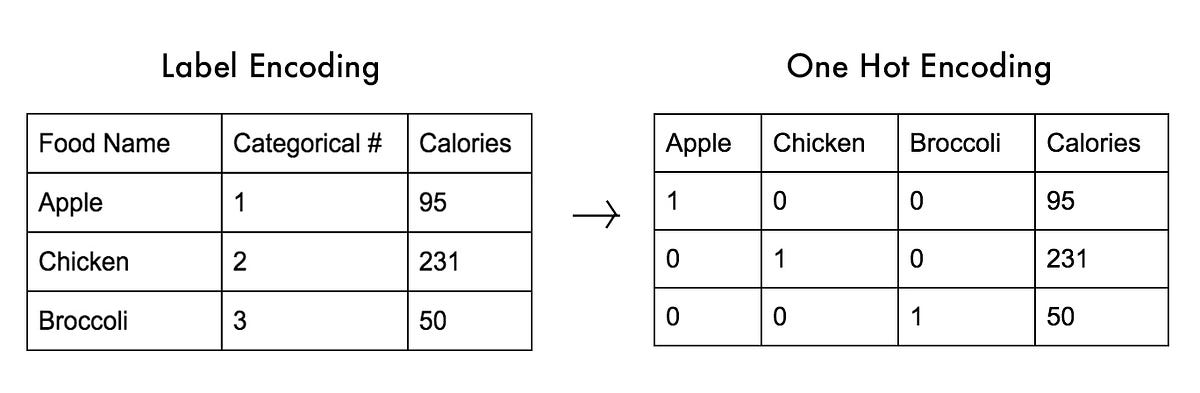

Для реализации данного метода можно воспользоваться двумя алгоритмами:

1. `get_dummies()` - встроенный метод библиотеки `Pandas`. Это простая функция, а не алгоритм Кодирования, поэтому он и называется *глупый*, он не запоминает шаги кодирования, словари и не способен сделать обратного преобразования.
2. Кодировщик `OneHotEncoder()` из библиотеки `sklearn` из модуля `preprocessing`. По принципу работы действует точно также как `get_dummies()`. Основное отличие - это умный кодировщик, т.е. это некоторая модель которая обучалась на данных, запомнила словарь и т.д., дальше может быть с этими параметры применяться к другому набору данных, к новым данным например. `get_dummies()` - это просто метод класса, который по сути вы одноразово используете.

Для примера возьмем переменную `race/ethnicity`:

In [18]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [19]:
import pandas as pd

df = pd.get_dummies(df, columns=['race/ethnicity'])

df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,bachelor's degree,standard,1,72,72,74,False,True,False,False,False
1,0,some college,standard,0,69,90,88,False,False,True,False,False
2,0,master's degree,standard,1,90,95,93,False,True,False,False,False
3,1,associate's degree,free/reduced,1,47,57,44,True,False,False,False,False
4,1,some college,standard,1,76,78,75,False,False,True,False,False


Теперь, мы видим, что вместо исходной переменной у нас появилось 5 новых переменных (столбцов): `race/ethnicity_group A, race/ethnicity_group B, race/ethnicity_group C, race/ethnicity_group D, race/ethnicity_group E`, у каждой из которой есть префикс исходного названия столбца, а в ячейках расположены $0$ или $1$, отсутствует категория или присутствует для объекта (строки).

Применим метод для другой переменной `parental level of education`, но теперь воспользовавшись *умным* кодировщиком из библиотеки `sklearn`:

`OneHotEncoder` требует, чтобы данные были в формате двумерного массива (2D-array), поэтому сначала преобразуем столбец в двумерный массив, используя `.values.reshape(-1, 1)`:

In [20]:
from sklearn import preprocessing

# 1. Инициализация алгоритма кодировщика
one_hot_encoder = preprocessing.OneHotEncoder()

# 2. Обучение алгоритма кодировщика
one_hot_encoder.fit(df['parental level of education'].values.reshape(-1, 1))

# [1,2,3,4]
# [[1],[2],[3],[4]] - reshape(-1, 1)

OneHotEncoder()

In [ ]:
# 1. Создать
# 2. Обучить (fit())
# 3. Преобразовать (transform())

In [21]:
# 3. Применение модели кодировщика
x_new = one_hot_encoder.transform(df['parental level of education'].values.reshape(-1, 1)).toarray()

In [22]:
x_new

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [23]:
x_new.shape

(1000, 6)

**`OneHotEncoder` в отличии от других кодировщиков, возвращает новый объект данных, который самостоятельно необходимо добавить после в исходный датасет:**

In [24]:
# Получение названий новых столбцов
encoded_columns = one_hot_encoder.get_feature_names_out(['parental level of education'])

# Преобразование в DataFrame для удобства
encoded_df = pd.DataFrame(x_new, columns=encoded_columns)

# Объединение с исходным DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Удаление оригинального столбца (опционально)
df.drop(columns=['parental level of education'], inplace=True)

In [25]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,standard,1,72,72,74,False,True,False,False,False,0.0,1.0,0.0,0.0,0.0,0.0
1,0,standard,0,69,90,88,False,False,True,False,False,0.0,0.0,0.0,0.0,1.0,0.0
2,0,standard,1,90,95,93,False,True,False,False,False,0.0,0.0,0.0,1.0,0.0,0.0
3,1,free/reduced,1,47,57,44,True,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0
4,1,standard,1,76,78,75,False,False,True,False,False,0.0,0.0,0.0,0.0,1.0,0.0


В чём преимущества использования *умных* кодировщиков из-под капота библиотеки `sklearn`:
1. Они сохраняют информацию о категориях во время вызова `fit()` и применяет ту же логику кодирования при вызове `transform()`. Это гарантирует, что новые данные обрабатываются точно так же, как и обучающие. В отличии `pd.get_dummies`, который работает только один раз на предоставленных данных и не сохраняет никаких параметров. Кодировка новых данных требует повторения всех шагов вручную.
2. Они способны обрабатывать неизвестные категории через параметр `handle_unknown`. Это бывает нужно, когда в новом наборе данных присутствует новая категория, не виданная ранее. Например:
- `handle_unknown='ignore'`: игнорирует неизвестные категории.
- `handle_unknown='infrequent_if_exist'`: объединяет редкие категории в одну группу.
3. `OneHotEncoder`: По умолчанию возвращает разреженные матрицы (если `sparse_output=True`). Это экономит память и ускоряет вычисления при большом числе категорий.
4. *Умные* кодировщики поддерживают обработку нескольких категориальных столбцов одновременно. А также позволяют явно задавать категории (categories) и имеют множество полезных методов, таких как `get_feature_names_out()` для получения удобных названий столбцов или `inverse_transform()` - метод обратного преобразования. `pd.get_dummies`: Обладает минимальным набором настроек и предназначен для простых задач.


### Работа с множественными категориями

Мы рассмотрели разные способы кодирования переменных, а также обсуждали преимущества и недостатки различных подходов. Так одна из сложностей при кодирование переменных - это наличие множественных категорий для одного объекта.

In [26]:
import pandas as pd

df= pd.DataFrame({
    'game': [
        'The Witcher 3',
        'Minecraft',
        'Overwatch',
        'Dark Souls',
        'Fortnite',
        'Civilization VI',
        'Stardew Valley',
        'GTA V',
        'League of Legends',
        'Among Us'
    ],
    'genres': [
        'RPG,Action,Adventure',
        'Sandbox,Survival,Creative',
        'Shooter,Multiplayer,Action',
        'RPG,Action,Adventure',
        'Battle Royale,Shooter,Multiplayer',
        'Strategy,Simulation,Turn-Based',
        'Simulation,Farming,Indie',
        'Action,Adventure,Open World',
        'MOBA,Multiplayer,Strategy',
        'Social Deduction,Multiplayer'
    ]
})

df

,game,genres
0,The Witcher 3,"RPG,Action,Adventure"
1,Minecraft,"Sandbox,Survival,Creative"
2,Overwatch,"Shooter,Multiplayer,Action"
3,Dark Souls,"RPG,Action,Adventure"
4,Fortnite,"Battle Royale,Shooter,Multiplayer"
5,Civilization VI,"Strategy,Simulation,Turn-Based"
6,Stardew Valley,"Simulation,Farming,Indie"
7,GTA V,"Action,Adventure,Open World"
8,League of Legends,"MOBA,Multiplayer,Strategy"
9,Among Us,"Social Deduction,Multiplayer"


В результате мы создали некоторый небольшой датасет с играми, где каждой игре может соответствовать несколько жанров, разделенные запятой (т.е. несколько категорий из переменной `genres`).

Если мы будем кодировать переменную genres с использованием `LabelEncoder()`, то так как он не распознает множественные категории, то будет кодировать набор категорий для одного объекта целиком, что по логике и содержанию неверно, поэтому лучше воспользоваться подходом `One Hot Encoding`.

Здесь, как и в предыдущем Юните, можно применить как *умный* кодировщик из библиотеки `sklearn`, так и *глупый*, встроенный в библиотеку `Pandas`:


In [28]:
df['genres'].str.get_dummies(sep=',')

,Action,Adventure,Battle Royale,Creative,Farming,Indie,MOBA,Multiplayer,Open World,RPG,Sandbox,Shooter,Simulation,Social Deduction,Strategy,Survival,Turn-Based
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
6,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
7,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [29]:
# pd.get_dummies()
tmp = df['genres'].str.get_dummies(sep=',')

# добавление префикса к названию новых колонок
tmp.columns = tmp.columns.str.split().str[0]
tmp = tmp.add_prefix('genres_').reset_index(drop=True)

tmp

,genres_Action,genres_Adventure,genres_Battle,genres_Creative,genres_Farming,genres_Indie,genres_MOBA,genres_Multiplayer,genres_Open,genres_RPG,genres_Sandbox,genres_Shooter,genres_Simulation,genres_Social,genres_Strategy,genres_Survival,genres_Turn-Based
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
6,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
7,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


**Стоит обратить внимание на два нюанса при использовании данного метода:**
1. Метод не изменяет исходный датасет: Этот метод создает новый DataFrame с закодированными переменными. Если вы хотите добавить закодированные столбцы в исходный DataFrame, необходимо явно использовать pd.concat.
2. Названия новых переменных: Новые столбцы получают названия, соответствующие значениям категорий. Эти названия не содержат префикса исходной колонки. Если у вас есть другая переменная, которую вы планируете закодировать аналогично, и в ней есть категории с такими же названиями, это приведет к созданию нескольких столбцов с одинаковыми именами. Что в свою очередь может вызвать ошибки или некорректную обработку данных.

**Добавление префикса (`add_prefix('genres_')`) важно потому что:**

- Избегает конфликтов имён колонок при объединении dummy-переменных из разных признаков.

- Сохраняет понятность — видно, к какому исходному признаку относится каждая колонка.

- Упрощает отладку и обучение моделей, особенно если ты работаешь с десятками категориальных признаков.

In [30]:
import pandas as pd

df = pd.DataFrame({
    'genres': ['Action,Comedy', 'Drama', 'Comedy', 'Action,Drama'],
    'year': [2010, 2012, 2014, 2016]
})
df['country'] = ['Action', 'USA', 'Comedy', 'USA']

df

,genres,year,country
0,"Action,Comedy",2010,Action
1,Drama,2012,USA
2,Comedy,2014,Comedy
3,"Action,Drama",2016,USA


Мини-пример: две колонки, в которых есть одинаковые категории. Разожим из без префикса с помощью get_dummies()

In [31]:
tmp = df['genres'].str.get_dummies(sep=',')
tmp_country = df['country'].str.get_dummies()
df = pd.concat([df, tmp, tmp_country], axis=1)
df

,genres,year,country,Action,Comedy,Drama,Action,Comedy,USA
0,"Action,Comedy",2010,Action,1,1,0,1,0,0
1,Drama,2012,USA,0,0,1,0,0,1
2,Comedy,2014,Comedy,0,1,0,0,1,0
3,"Action,Drama",2016,USA,1,0,1,0,0,1


Две колонки с одинаковым названием!!! - **плохо**

In [32]:
# сделаем все правильно, добавив префиксы
tmp = df['genres'].str.get_dummies(sep=',').add_prefix('genres_')
tmp_country = df['country'].str.get_dummies().add_prefix('country_')

df = pd.concat([df, tmp, tmp_country], axis=1)

In [33]:
df

,genres,year,country,Action,Comedy,Drama,Action,Comedy,USA,genres_Action,genres_Comedy,genres_Drama,country_Action,country_Comedy,country_USA
0,"Action,Comedy",2010,Action,1,1,0,1,0,0,1,1,0,1,0,0
1,Drama,2012,USA,0,0,1,0,0,1,0,0,1,0,0,1
2,Comedy,2014,Comedy,0,1,0,0,1,0,0,1,0,0,1,0
3,"Action,Drama",2016,USA,1,0,1,0,0,1,1,0,1,0,0,1


In [34]:
# Теперь воспользуемся умным кодировщиком из библиотеки sklearn

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Преобразование строки с категориями в список (list) из категорий
df['genres_split'] = df['genres'].str.split(',')
df

,genres,year,country,Action,Comedy,Drama,Action,Comedy,USA,genres_Action,genres_Comedy,genres_Drama,country_Action,country_Comedy,country_USA,genres_split
0,"Action,Comedy",2010,Action,1,1,0,1,0,0,1,1,0,1,0,0,"[Action, Comedy]"
1,Drama,2012,USA,0,0,1,0,0,1,0,0,1,0,0,1,[Drama]
2,Comedy,2014,Comedy,0,1,0,0,1,0,0,1,0,0,1,0,[Comedy]
3,"Action,Drama",2016,USA,1,0,1,0,0,1,1,0,1,0,0,1,"[Action, Drama]"


In [ ]:
type(df.loc[0, 'genres_split'])

list

In [36]:
# Инициализация MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [37]:
# Применение MultiLabelBinarizer к колонке 'genres'
genres_encoded = mlb.fit_transform(df['genres_split'])
genres_encoded

array([[1, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

In [39]:
# Создание нового DataFrame с закодированными жанрами
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Соединение с исходным DataFrame
df = pd.concat([df, genres_df], axis=1)

df.head()

,genres,year,country,Action,Comedy,Drama,Action,Comedy,USA,genres_Action,genres_Comedy,genres_Drama,country_Action,country_Comedy,country_USA,genres_split,Action,Comedy,Drama
0,"Action,Comedy",2010,Action,1,1,0,1,0,0,1,1,0,1,0,0,"[Action, Comedy]",1,1,0
1,Drama,2012,USA,0,0,1,0,0,1,0,0,1,0,0,1,[Drama],0,0,1
2,Comedy,2014,Comedy,0,1,0,0,1,0,0,1,0,0,1,0,[Comedy],0,1,0
3,"Action,Drama",2016,USA,1,0,1,0,0,1,1,0,1,0,0,1,"[Action, Drama]",1,0,1
